In [39]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cmcrameri import cm as cmc
import numpy as np
import pandas as pd
import pickle

In [4]:
with open('afterpulse_dfs_all.pkl', 'rb') as f:
    df_all = pickle.load(f)

In [13]:
grp = df_all.groupby(by='lake_nr')
sats = grp[['ratio_saturation', 'is_saturated']].quantile(.95).sort_values('ratio_saturation', ascending=False).reset_index()

In [57]:
i = 15
row = sats.iloc[i]
sat = row.ratio_saturation
lknr = row.lake_nr
surf_elev = dfi.elev_saturation.median()
dfi = df_all[df_all.lake_nr == lknr].copy()
dfi.sort_values('ratio_saturation', ascending=True, inplace=True)
surf_elev = dfi.peak_loc_nonsaturated.median()

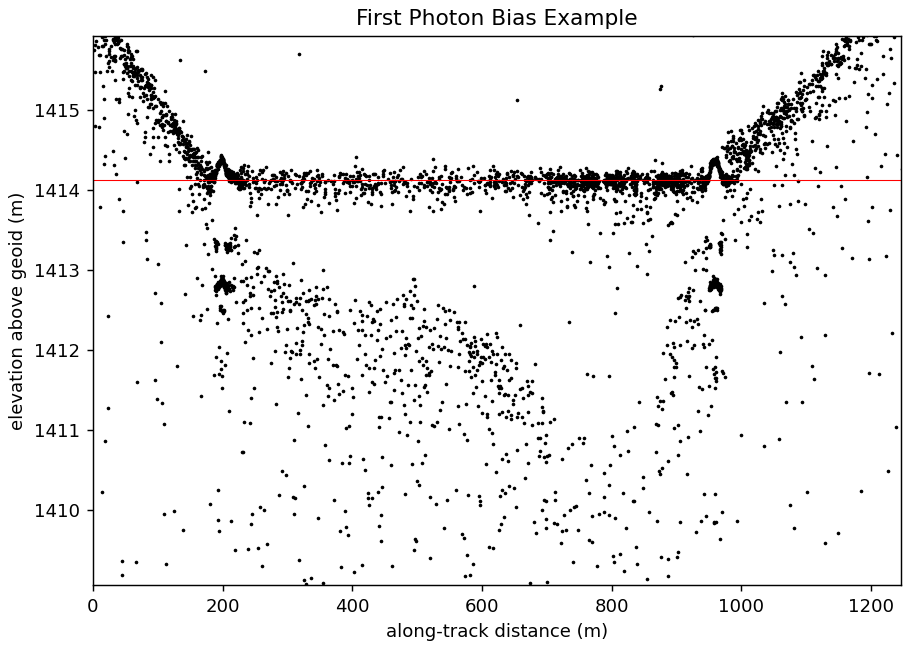

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[7, 5], dpi=130)
xl = np.array([194.04806837295317, 1440.5039248444755])
yl = np.array([1409.0662348439473, 1415.9318645556289])
scatt = ax.scatter(dfi.xatc - xl[0] + np.random.uniform(-0.35, 0.35, len(dfi)), dfi.h, s=1, c='k')
ax.plot(xl-xl[0], [surf_elev]*2, 'r-', lw=0.6)
ax.set_ylim(yl)
ax.set_xlim(xl-xl[0])
ax.set_xlabel('along-track distance (m)')
ax.set_ylabel('elevation above geoid (m)')
ax.set_title('First Photon Bias Example')
fig.tight_layout(pad=0.5)
plt.savefig('zzz_random_plots/FPB_lake_1.jpg', dpi=600)

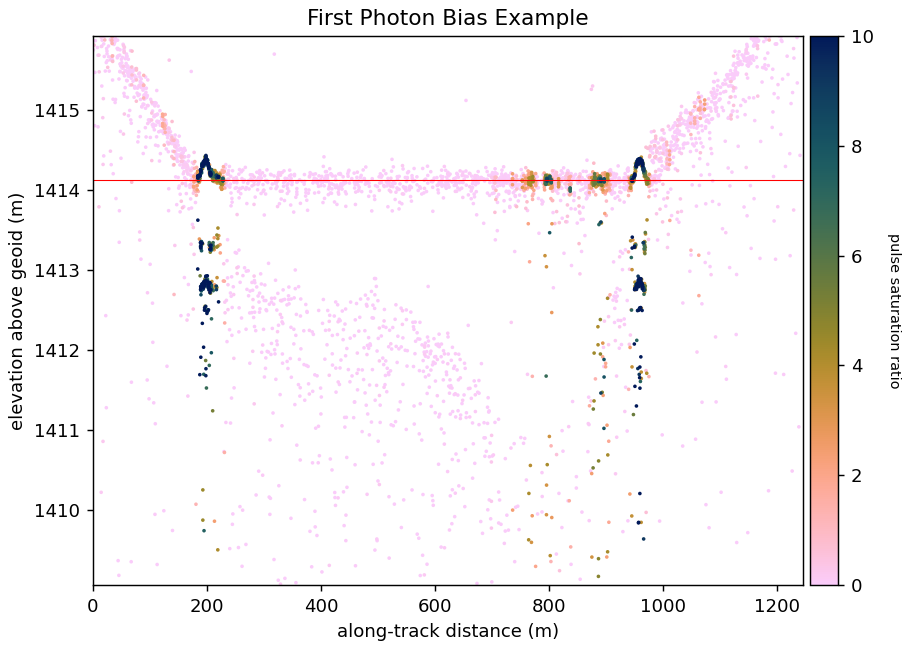

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[7, 5], dpi=130)
xl = np.array([194.04806837295317, 1440.5039248444755])
yl = np.array([1409.0662348439473, 1415.9318645556289])
scatt = ax.scatter(dfi.xatc - xl[0] + np.random.uniform(-0.35, 0.35, len(dfi)), dfi.h, s=1, c=dfi.ratio_saturation, cmap=cmc.batlow_r, vmin=0, vmax=10)
ax.plot(xl-xl[0], [surf_elev]*2, 'r-', lw=0.6)
ax.set_ylim(yl)
ax.set_xlim(xl-xl[0])
ax.set_xlabel('along-track distance (m)')
ax.set_ylabel('elevation above geoid (m)')
# add the colorbar 
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='4%', pad=0.05)
cbar = fig.colorbar(scatt, cax=cax, orientation='vertical')
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('pulse saturation ratio', rotation=270, fontsize=8)
ax.set_title('First Photon Bias Example')
fig.tight_layout(pad=0.5)
plt.savefig('zzz_random_plots/FPB_lake_2.jpg', dpi=600)

In [45]:
dfi

,geoid,h,lat,lon,mframe,ph_id_pulse,snr,xatc,ph_index,ratio_saturation,elev_saturation,is_saturated,peak_loc_nonsaturated,h_relative_to_saturated_peak,beam_strength,beam_number,dead_time,gtx,lake_nr
pulseid,,,,,,,,,,,,,,,,,,,
1168961451001,36.575797,1418.999765,66.221993,-48.960325,1168961451,1,0.886402,0.000000,0,0.000000,NaN,False,1414.127121,NaN,weak,4,3.052500e-09,gt2r,1452
1168961451001,36.575797,1419.103891,66.221993,-48.960325,1168961451,1,0.855555,0.000030,1,0.000000,NaN,False,1414.127121,NaN,weak,4,3.052500e-09,gt2r,1452
1168961451002,36.575797,1376.881845,66.221999,-48.960327,1168961451,2,0.000000,0.699228,2,0.369326,1418.965707,False,1414.127121,-42.083862,weak,4,3.052500e-09,gt2r,1452
1168961451002,36.575797,1387.516488,66.221999,-48.960327,1168961451,2,0.000000,0.701938,3,0.369326,1418.965707,False,1414.127121,-31.449219,weak,4,3.052500e-09,gt2r,1452
1168961451002,36.575797,1418.609872,66.221999,-48.960327,1168961451,2,0.631916,0.709895,4,0.369326,1418.965707,False,1414.127121,-0.355835,weak,4,3.052500e-09,gt2r,1452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168961461197,36.575830,1417.129004,66.235888,-48.964228,1168961461,197,0.931745,1559.330544,6580,0.045954,1418.498724,False,1414.127121,-1.369720,weak,4,3.052500e-09,gt2r,1452
1168961461197,36.575830,1422.808691,66.235888,-48.964228,1168961461,197,0.000000,1559.331974,6581,0.045954,1418.498724,False,1414.127121,4.309967,weak,4,3.052500e-09,gt2r,1452
1168961461198,36.575830,1407.944678,66.235894,-48.964230,1168961461,198,0.036512,1560.037818,6582,0.000000,NaN,False,1414.127121,NaN,weak,4,3.052500e-09,gt2r,1452


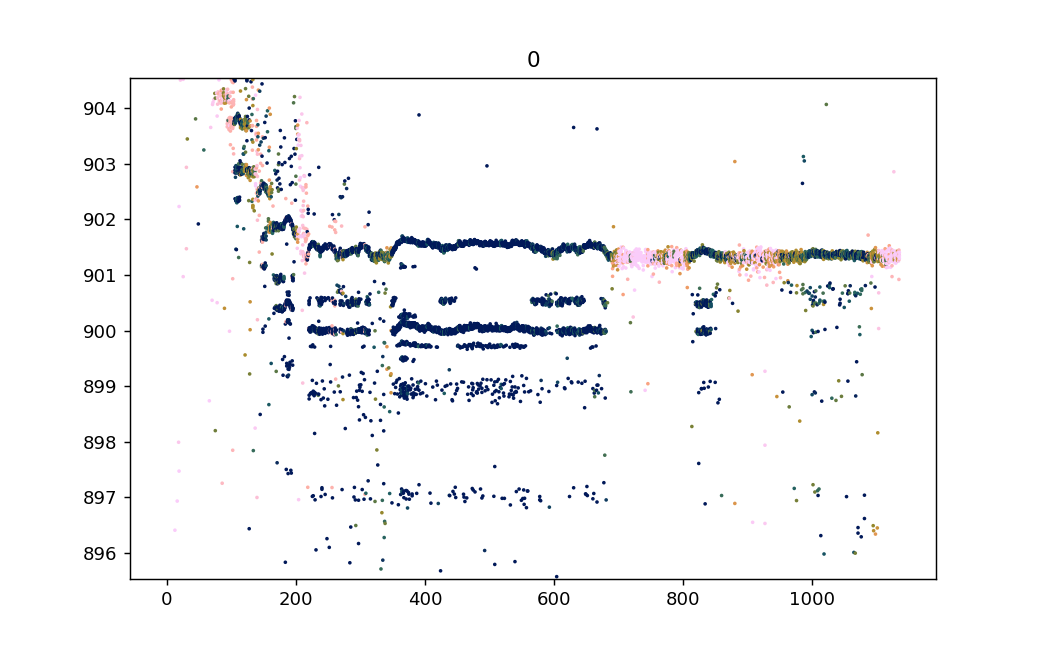

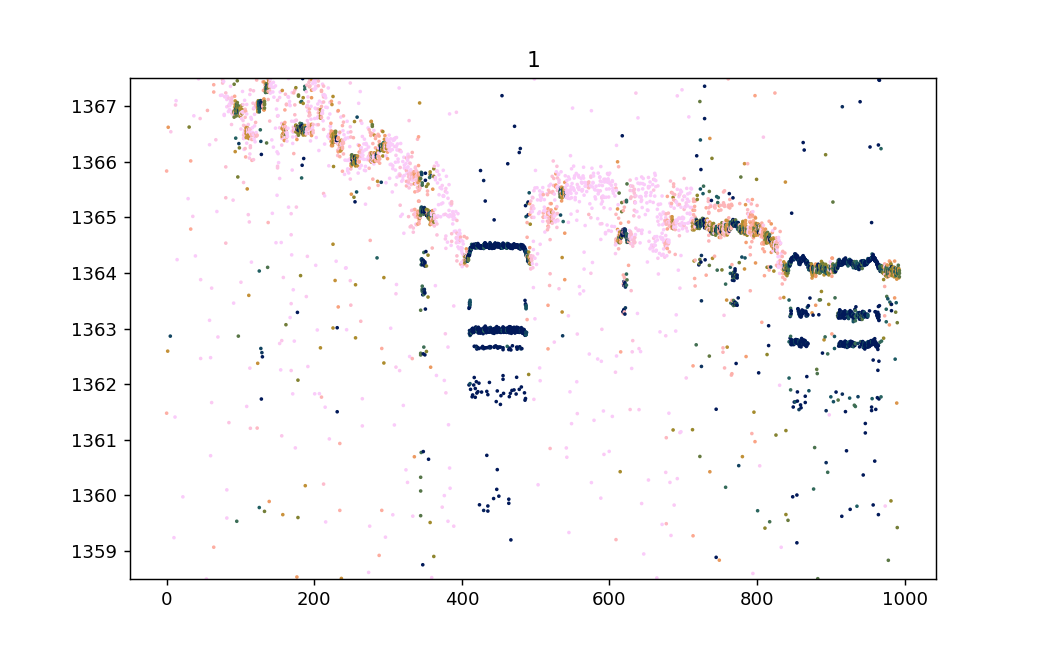

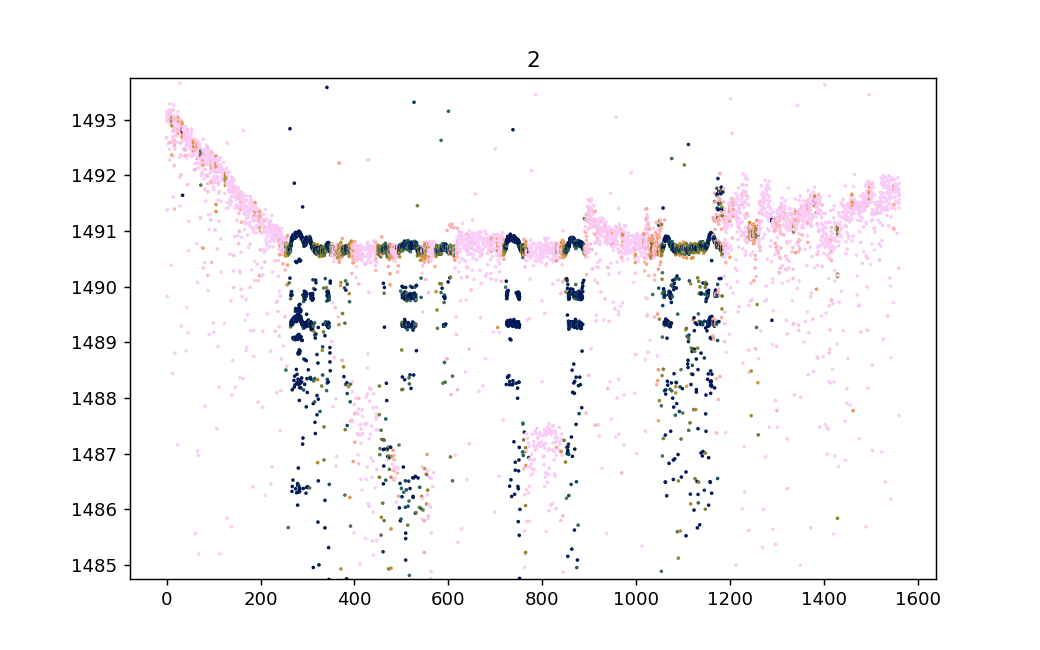

In [55]:
plt.close('all')
n = 3
for i in range(n):
    row = sats.iloc[i]
    sat = row.ratio_saturation
    lknr = row.lake_nr
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[8, 5], dpi=130)
    dfi = df_all[df_all.lake_nr == lknr]
    ax.scatter(dfi.xatc, dfi.h, s=1, c=dfi.ratio_saturation, cmap=cmc.batlow_r, vmin=0, vmax=5)
    surf_elev = dfi.elev_saturation.median()
    ax.set_ylim((surf_elev-6, surf_elev+3))
    ax.set_title('%i' % i)

In [14]:
sats.lake_nr

,lake_nr,ratio_saturation,is_saturated
0,2015,17.416004,1.0
1,2849,16.595875,1.0
2,1488,14.893635,1.0
3,1794,14.721061,1.0
4,323,13.767384,1.0
...,...,...,...
2935,1592,0.000000,0.0
2936,2582,0.000000,0.0
2937,1599,0.000000,0.0
2938,692,0.000000,0.0


In [7]:
df_all

,geoid,h,lat,lon,mframe,ph_id_pulse,snr,xatc,ph_index,ratio_saturation,elev_saturation,is_saturated,peak_loc_nonsaturated,h_relative_to_saturated_peak,beam_strength,beam_number,dead_time,gtx,lake_nr
pulseid,,,,,,,,,,,,,,,,,,,
3961163203001,-37.993243,222.345874,-85.443689,-153.758829,3961163203,1,0.000000,0.000000,0,0.002963,147.758741,False,116.84925,74.587133,strong,5,2.972500e-09,gt3l,0
3961163203001,-37.993244,218.679737,-85.443689,-153.758827,3961163203,1,0.000000,0.011290,1,0.002963,147.758741,False,116.84925,70.920996,strong,5,2.972500e-09,gt3l,0
3961163203001,-37.993246,205.138937,-85.443688,-153.758818,3961163203,1,0.000000,0.053213,2,0.002963,147.758741,False,116.84925,57.380197,strong,5,2.972500e-09,gt3l,0
3961163203001,-37.993253,170.710690,-85.443686,-153.758797,3961163203,1,0.000000,0.160051,3,0.002963,147.758741,False,116.84925,22.951949,strong,5,2.972500e-09,gt3l,0
3961163203001,-37.993254,159.481299,-85.443686,-153.758790,3961163203,1,0.040107,0.194729,4,0.002963,147.758741,False,116.84925,11.722558,strong,5,2.972500e-09,gt3l,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256221274197,41.020911,1940.948694,66.169196,-47.316766,256221274,197,0.736218,1560.044415,2232,0.000000,NaN,False,1941.90159,NaN,weak,6,3.067500e-09,gt3r,2939
256221274198,41.020888,2044.961778,66.169203,-47.316787,256221274,198,0.000000,1560.988606,2233,0.000000,NaN,False,1941.90159,NaN,weak,6,3.067500e-09,gt3r,2939
256221274199,41.020873,2021.026735,66.169209,-47.316784,256221274,199,0.053608,1561.638042,2234,0.000000,NaN,False,1941.90159,NaN,weak,6,3.067500e-09,gt3r,2939
